In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sn
%matplotlib inline
import pandas as pd
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor


In [2]:
df = pd.read_csv("/home/growlt199/Downloads/manufacturing_project/data/flight_processed_data_wo_stops.csv",index_col=0)

In [3]:
df.head()

airline   flight source_city departure_time stops   arrival_time  \
0  SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3   Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4   Vistara   UK-963       Delhi        Morning  zero        Morning   

  destination_city    class  duration  days_left  price  travel_route  
0           Mumbai  Economy      2.17          1   5953  Delhi-Mumbai  
1           Mumbai  Economy      2.33          1   5953  Delhi-Mumbai  
2           Mumbai  Economy      2.17          1   5956  Delhi-Mumbai  
3           Mumbai  Economy      2.25          1   5955  Delhi-Mumbai  
4           Mumbai  Economy      2.33          1   5955  Delhi-Mumbai

# one hot encoding 

In [4]:
#removing colums which i dont want to use in model 
df1= df.drop(['flight', 'travel_route'],axis=1)

In [5]:
df1.head()

airline source_city departure_time stops   arrival_time destination_city  \
0  SpiceJet       Delhi        Evening  zero          Night           Mumbai   
1  SpiceJet       Delhi  Early_Morning  zero        Morning           Mumbai   
2   AirAsia       Delhi  Early_Morning  zero  Early_Morning           Mumbai   
3   Vistara       Delhi        Morning  zero      Afternoon           Mumbai   
4   Vistara       Delhi        Morning  zero        Morning           Mumbai   

     class  duration  days_left  price  
0  Economy      2.17          1   5953  
1  Economy      2.33          1   5953  
2  Economy      2.17          1   5956  
3  Economy      2.25          1   5955  
4  Economy      2.33          1   5955

In [6]:
# get dummy variables for multiple columns
dummy_cols = ['airline', 'departure_time','arrival_time','source_city','destination_city','stops','class']
df1_dummy = pd.get_dummies(df1[dummy_cols])

# concatenate original DataFrame with dummy variable DataFrame
df1_concat = pd.concat([df1.drop(dummy_cols, axis=1), df1_dummy], axis=1)

# display result
df1_concat.head()

duration  days_left  price  airline_AirAsia  airline_Air_India  \
0      2.17          1   5953                0                  0   
1      2.33          1   5953                0                  0   
2      2.17          1   5956                1                  0   
3      2.25          1   5955                0                  0   
4      2.33          1   5955                0                  0   

   airline_GO_FIRST  airline_Indigo  airline_SpiceJet  airline_Vistara  \
0                 0               0                 1                0   
1                 0               0                 1                0   
2                 0               0                 0                0   
3                 0               0                 0                1   
4                 0               0                 0                1   

   departure_time_Afternoon  ...  destination_city_Chennai  \
0                         0  ...                         0   
1                         0  ...                         0   
2                         0  ...                         0   
3                         0  ...                         0   
4                         0  ...                         0   

   destination_city_Delhi  destination_city_Hyderabad  \
0                       0                           0   
1                       0                           0   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   destination_city_Kolkata  destination_city_Mumbai  stops_one  \
0                         0                        1          0   
1                         0                        1          0   
2                         0                        1          0   
3                         0                        1          0   
4                         0                        1          0   

   stops_two_or_more  stops_zero  class_Business  class_Economy  
0                  0           1               0              1  
1                  0           1               0              1  
2                  0           1               0              1  
3                  0           1               0              1  
4                  0           1               0              1  

[5 rows x 38 columns]

In [7]:
#create x and y where x are features for the model and y as target
x1 = df1_concat.drop('price',axis=1)
y1 = df1_concat['price']

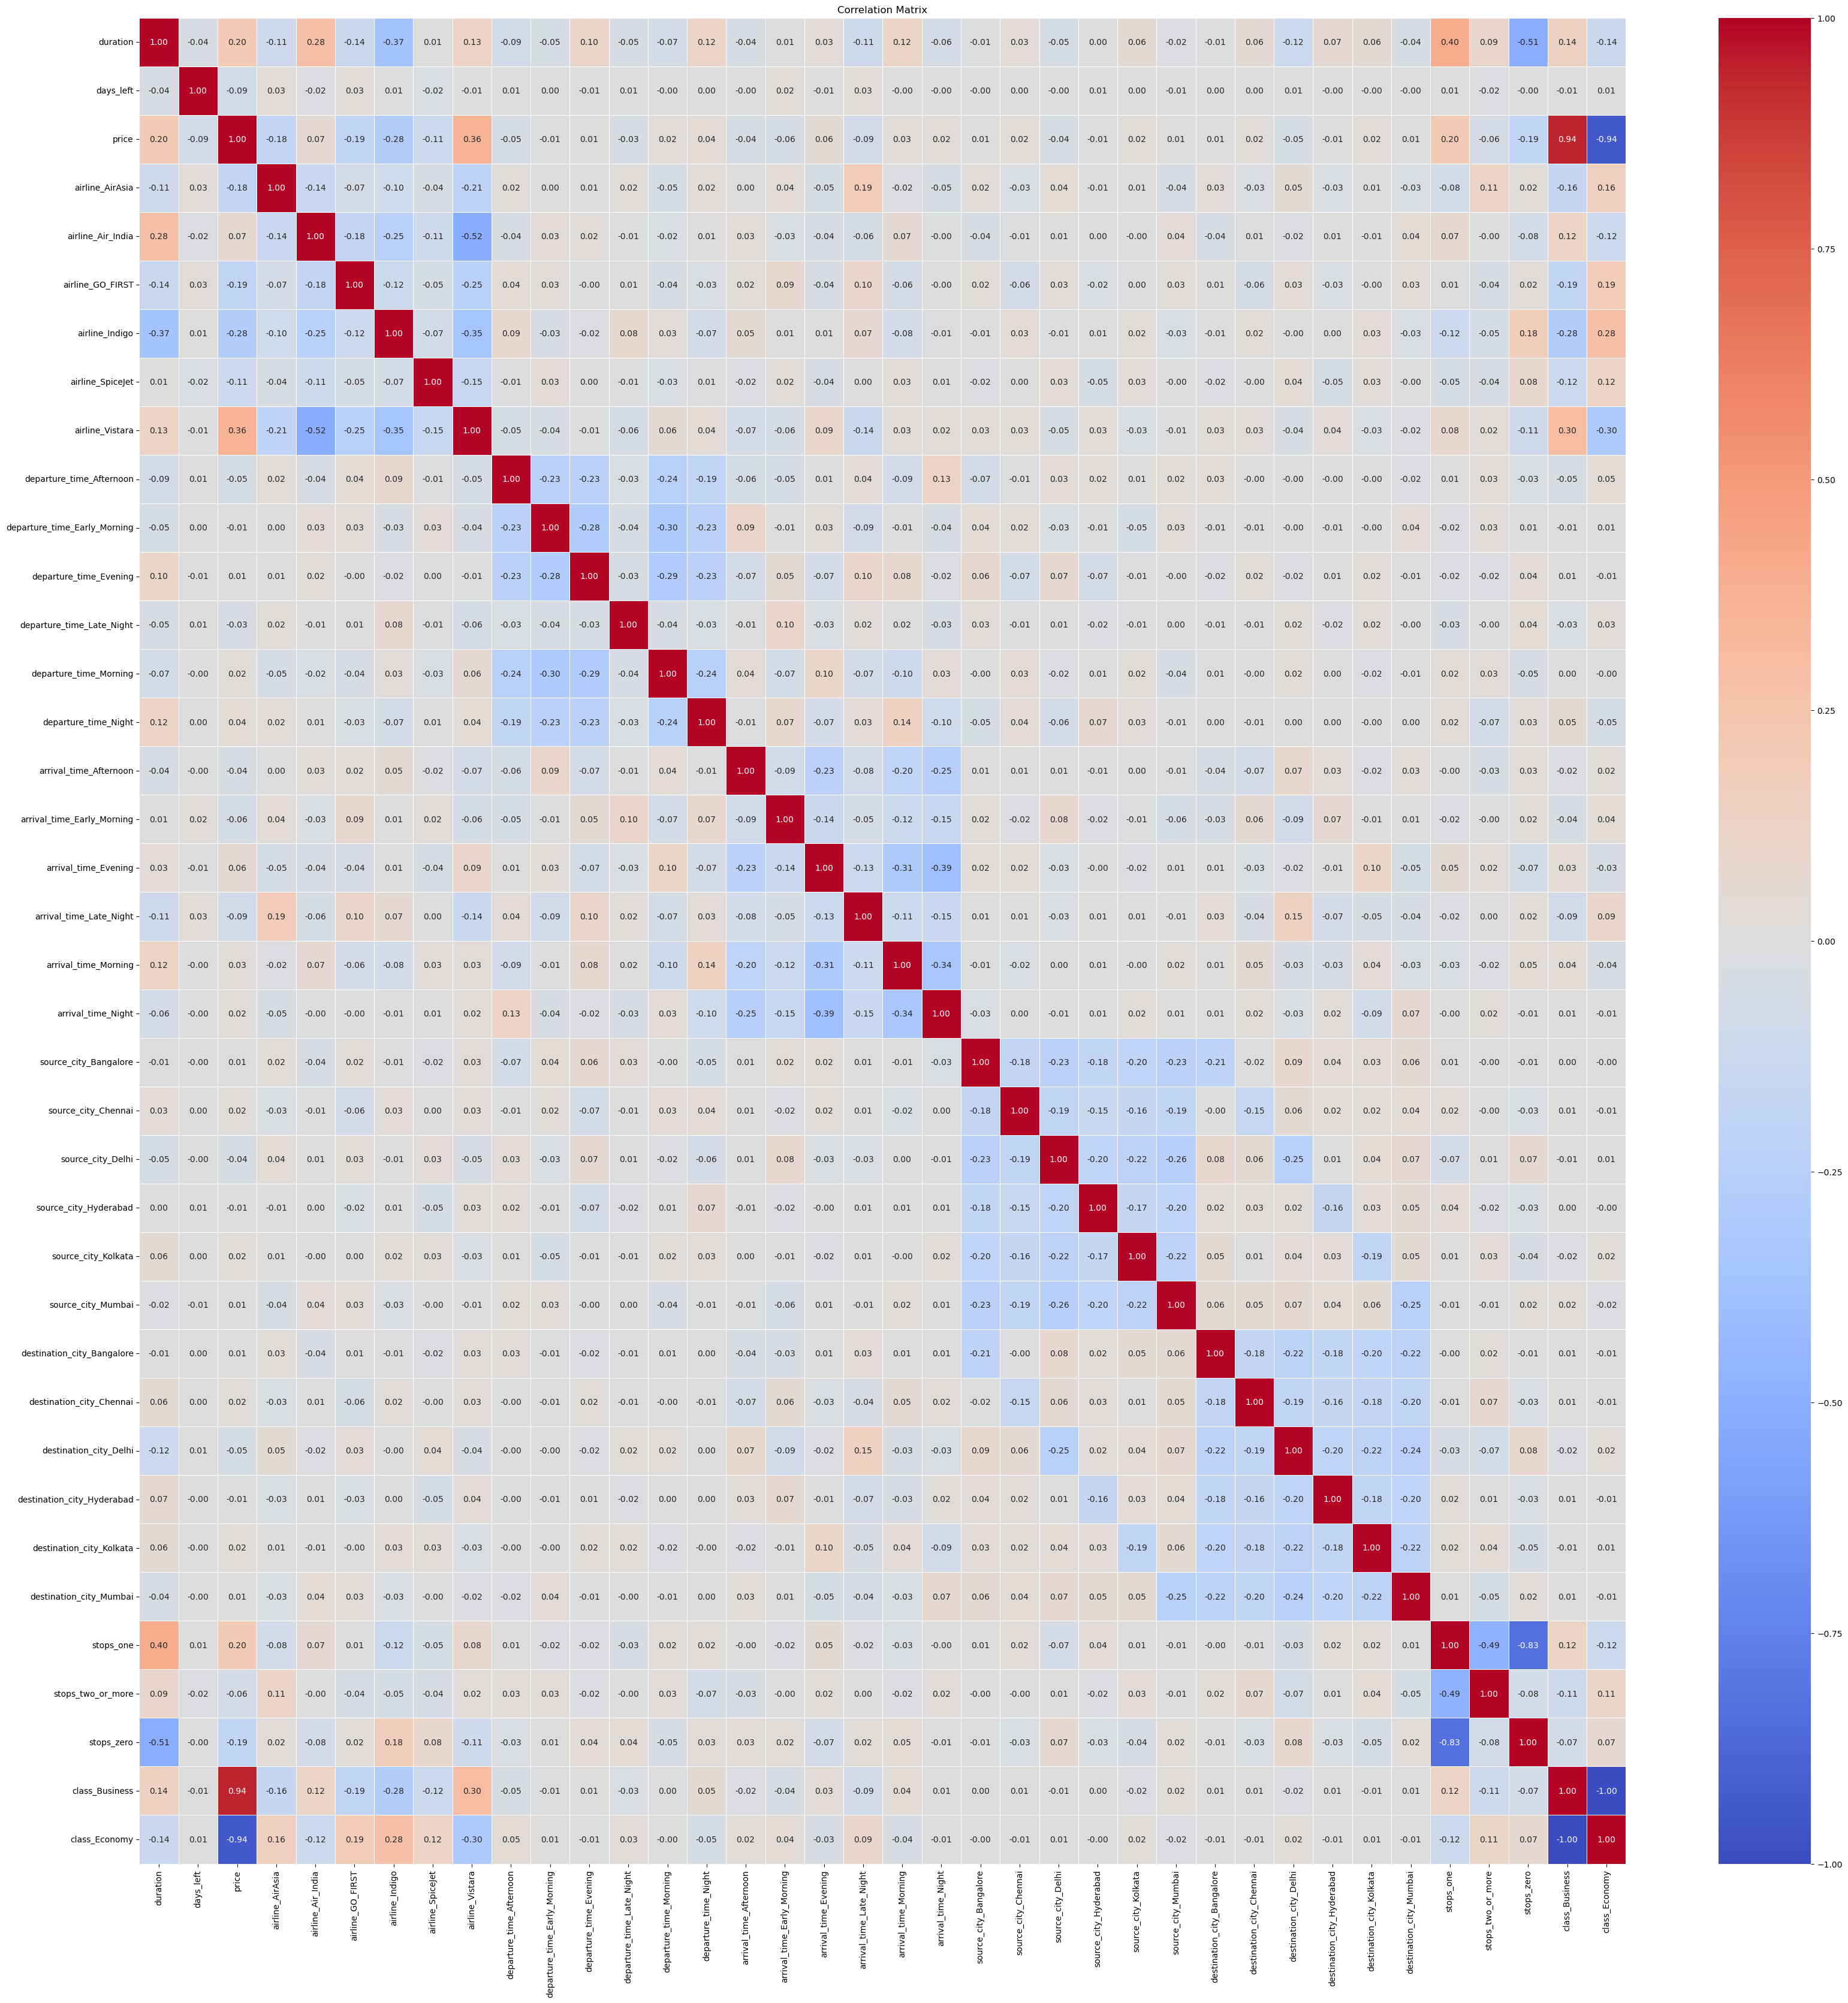

In [8]:
# Plot correlation matrix as a heatmap
plt.figure(figsize=(40, 40))
sn.heatmap(df1_concat.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [18]:
def regression(x1,y1):
    import time

    start_time = time.time()


    #use sklearn train test spilt for spilt our data in parts like training data and testing data 
    from sklearn.model_selection import train_test_split

    x_train, x_test, y_train, y_test = train_test_split(x1,y1,test_size=0.3, random_state =101, shuffle=True)

    #print shape of x train,y train, x test and y test 
    print('x_train shape:-',x_train.shape)
    print('x_test shape:-',x_test.shape)
    print('y_train shape:-',y_train.shape)
    print('y_test shape:-',y_test.shape)


    #import model from sklearn
    from sklearn.ensemble import RandomForestRegressor
    print('model name :- random forest regression')

    regr = RandomForestRegressor(random_state=123)

    #training model input as x_train and y_tarin
    regr.fit(x_train,y_train)

    print('score on the testing data :-',regr.score(x_test,y_test))
    print('score on the training data :-',regr.score(x_train,y_train))

    #finding error methods 
    from sklearn import metrics

    #model is creted show give x test data as input and retuen predictd data 
    predictions = regr.predict(x_test)

    #MAE
    print('MAE:-',metrics.mean_absolute_error(y_test,predictions))

    #MSE
    print('MSE:-',metrics.mean_squared_error(y_test,predictions))

    #RMSE
    print('RMSE:-',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

    #r2
    print("r2",r2_score(y_test, predictions))

    # Code or function to measure execution time
    end_time = time.time()
    execution_time = end_time - start_time
    print("Execution time:", execution_time, "seconds")
    
    return y_test,predictions

In [19]:
y_test,predictions = regression(x1,y1)

x_train shape:- (210100, 37)
x_test shape:- (90044, 37)
y_train shape:- (210100,)
y_test shape:- (90044,)
model name :- random forest regression
score on the testing data :- 0.9852813339894273
score on the training data :- 0.9975342479757643
MAE:- 1086.7450185805026
MSE:- 7575616.0720882015
RMSE:- 2752.3837072777847
r2 0.9852813339894273
Execution time: 56.064610958099365 seconds


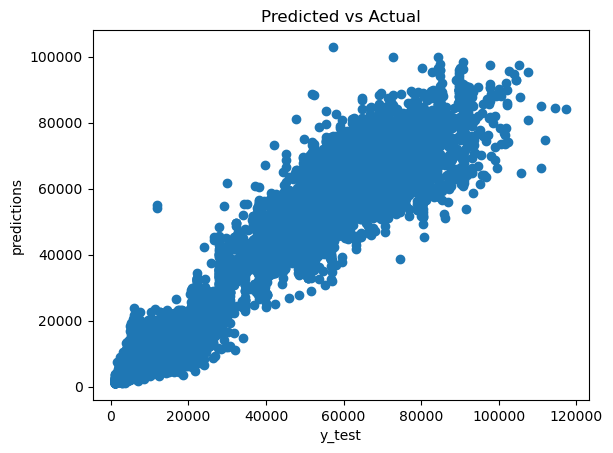

In [20]:
# Plotting the predicted values and actual values
plt.scatter(y_test,predictions)


# Customizing the plot
plt.title("Predicted vs Actual")
plt.xlabel("y_test")
plt.ylabel("predictions")


# Displaying the plot
plt.show()

In [ ]:
i = 0
list_Actual_predicted_1 = []
for true_value, pred_value in zip(y_test, predictions):
    list_Actual_predicted_1.append([true_value,pred_value])
    print(f"Actual: {true_value}, Predicted: {pred_value}")
    i+=1
    #if i == 20:
     #   break

In [13]:
len(list_Actual_predicted_1)

90044

In [14]:
pwd

'/home/growlt199/Downloads/manufacturing_project/model_training'

In [15]:
import pickle

# Assuming you have trained your SVR model and stored it in the 'svr_model' variable

# Specify the file path to save the model
file_path = '/home/growlt199/Downloads/manufacturing_project/model_training/model_pkl_files/model_random_forest_one_hot_encoding.pkl'

# Save the model to a .pkl file
with open(file_path, 'wb') as file:
    pickle.dump(regr, file)

# normlizing duration and days_left

In [22]:
df1_norm = df1_concat.copy()
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Apply z-score normalization to the selected columns
df1_norm[['duration', 'days_left']] = scaler.fit_transform(df1_norm[['duration', 'days_left']])

df1_norm.head()

duration  days_left  price  airline_AirAsia  airline_Air_India  \
0 -1.397860  -1.843936   5953                0                  0   
1 -1.375605  -1.843936   5953                0                  0   
2 -1.397860  -1.843936   5956                1                  0   
3 -1.386732  -1.843936   5955                0                  0   
4 -1.375605  -1.843936   5955                0                  0   

   airline_GO_FIRST  airline_Indigo  airline_SpiceJet  airline_Vistara  \
0                 0               0                 1                0   
1                 0               0                 1                0   
2                 0               0                 0                0   
3                 0               0                 0                1   
4                 0               0                 0                1   

   departure_time_Afternoon  ...  destination_city_Chennai  \
0                         0  ...                         0   
1                         0  ...                         0   
2                         0  ...                         0   
3                         0  ...                         0   
4                         0  ...                         0   

   destination_city_Delhi  destination_city_Hyderabad  \
0                       0                           0   
1                       0                           0   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   destination_city_Kolkata  destination_city_Mumbai  stops_one  \
0                         0                        1          0   
1                         0                        1          0   
2                         0                        1          0   
3                         0                        1          0   
4                         0                        1          0   

   stops_two_or_more  stops_zero  class_Business  class_Economy  
0                  0           1               0              1  
1                  0           1               0              1  
2                  0           1               0              1  
3                  0           1               0              1  
4                  0           1               0              1  

[5 rows x 38 columns]

In [23]:
x1_norm = df1_norm.drop('price',axis=1)
y1_norm = df1_norm['price']

In [24]:
y_test_1,predictions_1 = regression(x1_norm,y1_norm)

x_train shape:- (210100, 37)
x_test shape:- (90044, 37)
y_train shape:- (210100,)
y_test shape:- (90044,)
model name :- random forest regression
score on the testing data :- 0.9852483026950065
score on the training data :- 0.9975403765074339
MAE:- 1087.4013650049224
MSE:- 7592617.096822108
RMSE:- 2755.470394836807
r2 0.9852483026950065
Execution time: 55.797481536865234 seconds


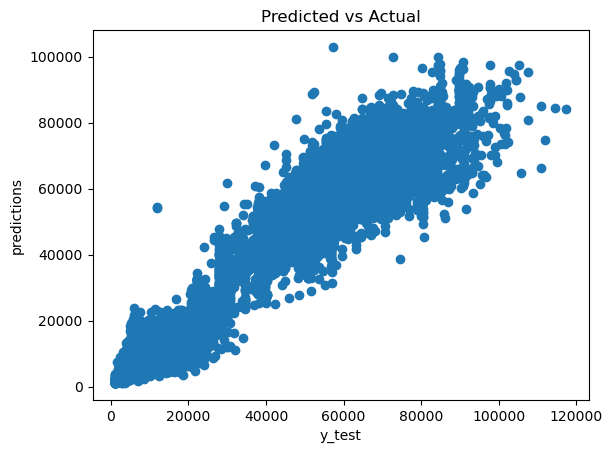

In [27]:
# Plotting the predicted values and actual values
plt.scatter(y_test_1,predictions_1)


# Customizing the plot
plt.title("Predicted vs Actual")
plt.xlabel("y_test")
plt.ylabel("predictions")


# Displaying the plot
plt.show()

# label encoding

In [25]:
#removing colums which i dont want to use in model 
df2= df.drop(['flight', 'travel_route'],axis=1)

In [26]:
df2.head()

airline source_city departure_time stops   arrival_time destination_city  \
0  SpiceJet       Delhi        Evening  zero          Night           Mumbai   
1  SpiceJet       Delhi  Early_Morning  zero        Morning           Mumbai   
2   AirAsia       Delhi  Early_Morning  zero  Early_Morning           Mumbai   
3   Vistara       Delhi        Morning  zero      Afternoon           Mumbai   
4   Vistara       Delhi        Morning  zero        Morning           Mumbai   

     class  duration  days_left  price  
0  Economy      2.17          1   5953  
1  Economy      2.33          1   5953  
2  Economy      2.17          1   5956  
3  Economy      2.25          1   5955  
4  Economy      2.33          1   5955

In [18]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Specify the list of categorical columns to encode
categorical_columns = ['airline', 'departure_time','arrival_time','source_city','destination_city','stops','class']

# Apply label encoding to each categorical column
for column in categorical_columns:
    df2[column] = label_encoder.fit_transform(df2[column])


In [19]:
df2.head()

airline  source_city  departure_time  stops  arrival_time  \
0        4            2               2      2             5   
1        4            2               1      2             4   
2        0            2               1      2             1   
3        5            2               4      2             0   
4        5            2               4      2             4   

   destination_city  class  duration  days_left  price  
0                 5      1      2.17          1   5953  
1                 5      1      2.33          1   5953  
2                 5      1      2.17          1   5956  
3                 5      1      2.25          1   5955  
4                 5      1      2.33          1   5955

In [20]:
#create x and y where x are features for the model and y as target
x2 = df2.drop('price',axis=1)
y2 = df2['price']

## Plot correlation matrix as a heatmap
plt.figure(figsize=(8, 7))
sn.heatmap(df2.corr(), annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [22]:
import time

start_time = time.time()

#use sklearn train test spilt for spilt our data in parts like training data and testing data 
from sklearn.model_selection import train_test_split

x_train2, x_test2, y_train2, y_test2 = train_test_split(x2,y2,test_size=0.3, random_state =101, shuffle=True)

#print shape of x train,y train, x test and y test 
print('x_train shape:-',x_train2.shape)
print('x_test shape:-',x_test2.shape)
print('y_train shape:-',y_train2.shape)
print('y_test shape:-',y_test2.shape)


#import model from sklearn
from sklearn.ensemble import RandomForestRegressor
print('model name :- random forest regression')

regr = RandomForestRegressor(random_state=123)

#training model input as x_train and y_tarin
regr.fit(x_train2,y_train2)

print('score on the testing data :-',regr.score(x_test2,y_test2))
print('score on the training data :-',regr.score(x_train2,y_train2))

#finding error methods 
from sklearn import metrics

#model is creted show give x test data as input and retuen predictd data 
predictions_2 = regr.predict(x_test2)

#MAE
print('MAE:-',metrics.mean_absolute_error(y_test2,predictions_2))

#MSE
print('MSE:-',metrics.mean_squared_error(y_test2,predictions_2))

#RMSE
print('RMSE:-',np.sqrt(metrics.mean_squared_error(y_test2,predictions_2)))

#r2
print("r2",r2_score(y_test2, predictions_2))

# Code or function to measure execution time
end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

x_train shape:- (210100, 9)
x_test shape:- (90044, 9)
y_train shape:- (210100,)
y_test shape:- (90044,)
model name :- random forest regression
score on the testing data :- 0.9852479797846426
score on the training data :- 0.9975298778733467
MAE:- 1102.3006496566325
MSE:- 7592783.297002268
RMSE:- 2755.5005528945676
r2 0.9852479797846426
Execution time: 37.645846366882324 seconds


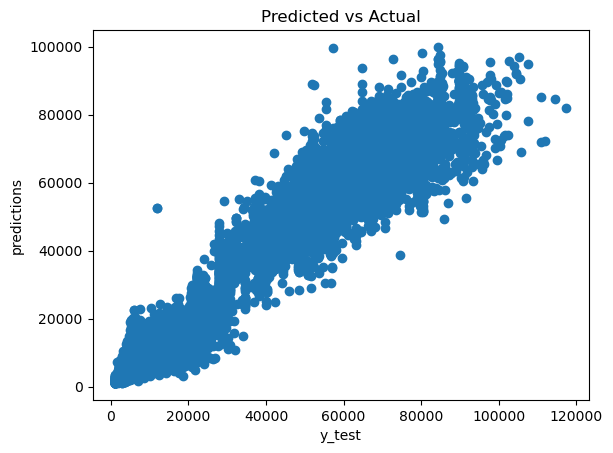

In [23]:
# Plotting the predicted values and actual values
plt.scatter(y_test2,predictions_2)


# Customizing the plot
plt.title("Predicted vs Actual")
plt.xlabel("y_test")
plt.ylabel("predictions")


# Displaying the plot
plt.show()

In [24]:
i = 0
list_Actual_predicted_2 = []
for true_value, pred_value in zip(y_test2, predictions_2):
    list_Actual_predicted_2.append([true_value,pred_value])
    print(f"Actual: {true_value}, Predicted: {pred_value}")
    i+=1
    #if i == 20:
     #   break

Actual: 5549, Predicted: 5553.83
Actual: 5892, Predicted: 5889.76
Actual: 37016, Predicted: 38674.21
Actual: 4500, Predicted: 4500.0
Actual: 39377, Predicted: 39456.52
Actual: 5891, Predicted: 5248.0
Actual: 23424, Predicted: 23311.28
Actual: 4502, Predicted: 4502.0
Actual: 5817, Predicted: 5825.02
Actual: 37658, Predicted: 40972.4
Actual: 54608, Predicted: 54608.0
Actual: 3223, Predicted: 3033.63
Actual: 3476, Predicted: 3850.74
Actual: 58125, Predicted: 58897.8
Actual: 3869, Predicted: 4723.54
Actual: 6568, Predicted: 6568.0
Actual: 2968, Predicted: 3045.04
Actual: 11508, Predicted: 12250.11
Actual: 12138, Predicted: 12556.63
Actual: 4389, Predicted: 4119.645
Actual: 10358, Predicted: 11226.5
Actual: 5685, Predicted: 6213.523333333333
Actual: 4044, Predicted: 5919.32
Actual: 7387, Predicted: 6611.48
Actual: 2339, Predicted: 2339.71
Actual: 82258, Predicted: 80855.45
Actual: 67004, Predicted: 67641.365
Actual: 4501, Predicted: 4504.15
Actual: 5949, Predicted: 6018.0
Actual: 79009, Pre

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [25]:
len(list_Actual_predicted_2)

90044

In [26]:
import pickle

# Assuming you have trained your SVR model and stored it in the 'svr_model' variable

# Specify the file path to save the model
file_path = '/home/growlt199/Downloads/manufacturing_project/model_training/model_pkl_files/model_random_forest_label_encoding.pkl'

# Save the model to a .pkl file
with open(file_path, 'wb') as file:
    pickle.dump(regr, file)

# collecting  actual and prediccted in one csv


In [27]:
list_Actual_predicted_1

[[5549, 5542.19],
 [5892, 5892.0],
 [37016, 38336.15],
 [4500, 4500.0],
 [39377, 39473.39],
 [5891, 5350.02],
 [23424, 23271.24],
 [4502, 4502.0],
 [5817, 5817.0],
 [37658, 40365.54],
 [54608, 54608.0],
 [3223, 2484.91],
 [3476, 4103.35],
 [58125, 59044.52],
 [3869, 4586.04],
 [6568, 6568.0],
 [2968, 2997.86],
 [11508, 12515.09],
 [12138, 12448.12],
 [4389, 4121.145],
 [10358, 11100.15],
 [5685, 6208.833333333332],
 [4044, 4789.17],
 [7387, 6192.78],
 [2339, 2339.0],
 [82258, 78697.69],
 [67004, 68325.11],
 [4501, 4504.16],
 [5949, 6041.0],
 [79009, 74892.19],
 [65529, 67426.16],
 [13392, 12824.74],
 [2836, 2888.29],
 [6444, 6444.0],
 [14133, 6264.8],
 [7950, 8134.85],
 [5954, 6005.18],
 [44280, 44597.82],
 [7021, 7023.63],
 [55377, 55392.71],
 [9840, 6216.78],
 [5648, 4720.15],
 [7150, 6686.82],
 [5446, 7107.3],
 [6634, 6634.0],
 [4827, 5293.93],
 [16140, 15903.67],
 [7958, 8001.05],
 [36565, 36565.0],
 [3716, 3630.5],
 [7474, 7605.48],
 [5276, 5636.7],
 [2700, 2700.0],
 [12371, 18077

In [28]:
list_Actual_predicted_2

[[5549, 5553.83],
 [5892, 5889.76],
 [37016, 38674.21],
 [4500, 4500.0],
 [39377, 39456.52],
 [5891, 5248.0],
 [23424, 23311.28],
 [4502, 4502.0],
 [5817, 5825.02],
 [37658, 40972.4],
 [54608, 54608.0],
 [3223, 3033.63],
 [3476, 3850.74],
 [58125, 58897.8],
 [3869, 4723.54],
 [6568, 6568.0],
 [2968, 3045.04],
 [11508, 12250.11],
 [12138, 12556.63],
 [4389, 4119.645],
 [10358, 11226.5],
 [5685, 6213.523333333333],
 [4044, 5919.32],
 [7387, 6611.48],
 [2339, 2339.71],
 [82258, 80855.45],
 [67004, 67641.365],
 [4501, 4504.15],
 [5949, 6018.0],
 [79009, 76070.91],
 [65529, 67650.28],
 [13392, 13211.54],
 [2836, 2836.0],
 [6444, 6432.55],
 [14133, 6888.47],
 [7950, 8246.79],
 [5954, 5987.23],
 [44280, 44403.86],
 [7021, 7023.63],
 [55377, 55589.37],
 [9840, 6644.05],
 [5648, 4595.0],
 [7150, 6978.93],
 [5446, 6722.59],
 [6634, 6634.0],
 [4827, 4845.06],
 [16140, 15990.62],
 [7958, 7979.54],
 [36565, 36565.0],
 [3716, 3700.45],
 [7474, 7547.35],
 [5276, 5576.22],
 [2700, 2700.0],
 [12371, 18

In [29]:
# Create a dictionary using list1's first column as keys
dictionary = {row[0]: row for row in list_Actual_predicted_1}

# Join the lists based on the first column
joined_list = [dictionary.get(row[0], row) + row[1:] for row in list_Actual_predicted_2]

print(joined_list)

[[5549, 5549.0, 5553.83], [5892, 5889.76, 5889.76], [37016, 37313.17, 38674.21], [4500, 4676.66, 4500.0], [39377, 44274.8, 39456.52], [5891, 7831.41, 5248.0], [23424, 23424.0, 23311.28], [4502, 4505.15, 4502.0], [5817, 5849.09, 5825.02], [37658, 46684.05, 40972.4], [54608, 54608.0, 54608.0], [3223, 4397.855, 3033.63], [3476, 4134.07, 3850.74], [58125, 59026.6, 58897.8], [3869, 3918.26, 4723.54], [6568, 6603.16, 6568.0], [2968, 3274.99, 3045.04], [11508, 11862.04, 12250.11], [12138, 12387.11, 12556.63], [4389, 4113.06, 4119.645], [10358, 15050.54, 11226.5], [5685, 5741.22, 6213.523333333333], [4044, 4026.84, 5919.32], [7387, 7036.86, 6611.48], [2339, 2467.52, 2339.71], [82258, 78697.69, 80855.45], [67004, 67004.0, 67641.365], [4501, 4501.0, 4504.15], [5949, 5949.0, 6018.0], [79009, 77653.11238095239, 76070.91], [65529, 65529.0, 67650.28], [13392, 12824.74, 13211.54], [2836, 2836.0, 2836.0], [6444, 6264.66, 6432.55], [14133, 16620.285, 6888.47], [7950, 8561.47, 8246.79], [5954, 9421.99, 

In [30]:
import csv

In [31]:
filename = '/home/growlt199/Downloads/manufacturing_project/model_training/random_forest_prediction.csv'

merged_data = zip(list_Actual_predicted_1, list_Actual_predicted_2)

with open(filename, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['Actual', 'predicted_one_hot', 'predicted_label'])  # Write the header
    csvwriter.writerows(joined_list)  # Write the data rows

print('CSV file created successfully.')


CSV file created successfully.


# try lasso regression

In [32]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming you have your data in X (features) and y (target variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Lasso regression model
lasso = Lasso(alpha=0.1)  # Adjust the alpha parameter for different levels of regularization

# Fit the model to the training data
lasso.fit(X_train, y_train)

# Make predictions on the test data
predictions = lasso.predict(X_test)

#see the score on training and testing 
print('score on the testing data :-',lasso.score(X_test,y_test))
print('score on the training data :-',lasso.score(X_train,y_train))

#MAE
print('MAE:-',metrics.mean_absolute_error(y_test,predictions))

#MSE
print('MSE:-',metrics.mean_squared_error(y_test,predictions))

#RMSE
print('RMSE:-',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

#r2
print("r2",r2_score(y_test, predictions))

score on the testing data :- 0.9112628075952065
score on the training data :- 0.9115059637386868
MAE:- 4573.318753719743
MSE:- 45684015.912985146
RMSE:- 6758.9951851577125
r2 0.9112628075952065


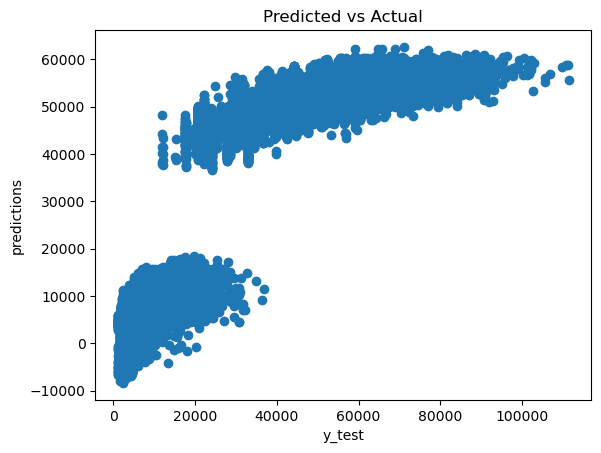

In [33]:
# Plotting the predicted values and actual values
plt.scatter(y_test,predictions)


# Customizing the plot
plt.title("Predicted vs Actual")
plt.xlabel("y_test")
plt.ylabel("predictions")


# Displaying the plot
plt.show()

In [34]:
i = 0
for true_value, pred_value in zip(y_test, predictions):
    #list_Actual_predicted.append([true_value,pred_value])
    print(f"Actual: {true_value}, Predicted: {pred_value}")
    i+=1

Actual: 40570, Predicted: 51703.86600621416
Actual: 5942, Predicted: -1652.5981039018661
Actual: 10903, Predicted: 8387.502061635761
Actual: 6187, Predicted: 4662.034168309605
Actual: 6502, Predicted: 5208.450601334758
Actual: 4721, Predicted: -909.1449010555698
Actual: 9093, Predicted: 6593.451224025252
Actual: 10783, Predicted: 11468.2847116421
Actual: 51595, Predicted: 49809.123271699646
Actual: 39847, Predicted: 52002.08441537481
Actual: 3988, Predicted: 2913.6002765636767
Actual: 5954, Predicted: 7956.125398822871
Actual: 12847, Predicted: 8873.854479835922
Actual: 13432, Predicted: 9240.113447309042
Actual: 6488, Predicted: 9524.356640517872
Actual: 66077, Predicted: 56119.407954902264
Actual: 73377, Predicted: 47976.932392109906
Actual: 1544, Predicted: -6864.89590065843
Actual: 9201, Predicted: 8160.689805226792
Actual: 4496, Predicted: 6976.092901086849
Actual: 60260, Predicted: 54766.22111023634
Actual: 12213, Predicted: 12260.921447080533
Actual: 4593, Predicted: 6146.286592

Actual: 14600, Predicted: 8886.356928954669
Actual: 10069, Predicted: 13385.6087272247
Actual: 22152, Predicted: 40426.12787688643
Actual: 51595, Predicted: 49547.80717866357
Actual: 3182, Predicted: 3134.689344339069
Actual: 37594, Predicted: 53122.74725302964
Actual: 6500, Predicted: 8172.918095475148
Actual: 4348, Predicted: 10566.571305561982
Actual: 11625, Predicted: 10486.64411722354
Actual: 55983, Predicted: 51024.473953216904
Actual: 65529, Predicted: 53330.30906906468
Actual: 6165, Predicted: 248.86683288310087
Actual: 6566, Predicted: 11253.042815581757
Actual: 8112, Predicted: 9790.427745715166
Actual: 2482, Predicted: 6310.872746161012
Actual: 5177, Predicted: 10734.074387219081
Actual: 7639, Predicted: 6270.729497135078
Actual: 5530, Predicted: 9298.262217644866
Actual: 8040, Predicted: 9722.958244360789
Actual: 5118, Predicted: 529.8108559413231
Actual: 6324, Predicted: 6940.537290367029
Actual: 2477, Predicted: 4856.056802867921
Actual: 5955, Predicted: 5127.002393811563